# [MO443] Trabalho de Esteganografia - Trabalho 01

> Trabalho realizado por Maria Angélica Krüger Miranda {197698}
>
> **Objetivo:** Implementar um algoritmo de estenografia em imagens digitais

## Introdução

A esteganografia é uma técnica que visa esconder uma informação dentro de outro objeto a fim de evitar detecções. Por meio desta, é possível ocultar qualquer tipo de conteúdo digital, desde texto até imagens, vídeos e conteúdos de áudio. Diante disso, neste trabalho, será utilizada esta técnica para esconder um arquivo texto, que conterá a mensagem que será ocultada, dentro de uma imagem digital. Esta técnica difere da criptografia pois a esteganografia apenas oculta a existência da informação, não alterando o formato da mesma.

A abordagem que será adotada é incorporar as informações nos bits menos significativos da imagem, permitindo que as alterações produzidas nessa não sejam perceptíveis aos olhos humanos. As imagens digitais são compostas por diversos canais, e neste caso serão adotadas imagens do tipo RGB, ou seja, imagens que contém três canais, cada uma delas associadas as cores vermelha (Red), verde (Green) e azul (Blue), respectivamente. Além disso, cada canal possui um valor contido no intervalo [0,255], representado por 1 byte. Portanto, o presente trabalho realizará a codificação de um texto em uma imagem manipulando os bits menos significativos e também realizará o processo inverso, a decodificação.

## Procedimento

Para realizar todo o processo de esteganografia é preciso entender e discutir as diversas partes que o compõe. Elas serão discutidas de forma separadas para facilitar o entendimento da lógica envolvida. Os princioais componentes necessários são:

- Dada uma imagem é preciso separar os três canais RGB;
- A partir dos canais da imagem, acessar o plano de bits;
- Dado um texto, convertê-lo para a sua forma binária e
- Dado um vetor binário, convertê-lo para o formato de texto

### Manipulação da Imagem

O primeiro passo para manipular uma imagem é carregá-la ao programa e para isso será utilizado a função `imread()` da biblioteca **OpenCv**. Alguns cuidados devem ser tomados a partir daqui. O primeiro deles diz respeito a ordem de armazenamento dos canais em imagens coloridas, ao invés de seguir a ordem tradicional R G B, há uma inversão, ou seja, B G R. Para seguir a padronização e facilitar o entendimento foi feito a inversão da ordem das bandas por meio da função `cvtColor()`, esta função realiza a conversão da imagem de um espaço de cor para outro. O segundo cuidado diz respeito ao tamanho da imagem, segundo a biblioteca, por padrão, a quantidade de pixels que será carregada deverá ser menor que $2^{30}$, caso precise carregar imagens maiores poderá redefinir o limite usando a variável do sistema `OPENCV_IO_MAX_IMAGE_PIXELS`. O último cuidado diz respeito a apresentação da imagem. Como está sendo utilizado um **Notebook**, não será possível utilizar a função `imshow()` nativa da biblioteca **OpenCV**, sendo assim, no lugar desta função foi utilizada a função `show()` da biblioteca **Mathplotlib**.

O próximo procedimento que será muito utilizado neste trabalho consiste na separação das bandas RGB da imagem. Há uma função da própria biblioteca **OpenCV** que realiza este procedimento que é a `merge()`, em que separa a-uma imagem de multicanais em diversas imagens de um canal cada. Para visualizar a imagem em tons de cinza é preciso reconfigurar o `cmap` para o mapa de cores desejado, que no caso foi os níveis de cinza. Além da representação da imagem em níveis de cinza também foi utilizada a representação das bandas das imagens nas suas respectivas cores, por exemplo, o canal vermelho varia de $0$ a $255$ e estes valores foram associados tanto a tons de cinze quanto a tons avermelhados.

A seguir é mostrado os procedimentos mencionados acima, desde o carregamento da imagem, conversão para o sistema de cores RGB, separação dos canais de cor e visualização. Para isso foi utilizado a imagem de um mandril macho para que seja notado a diferença entre vermelho, azul e verde na hora que mostra cada imagem em seu respectivo canal de cor. As regiões onde o vermelho está presente, por exemplo, ao visualizar a banda vermelha, percebe-se que a coloração apresenta maior intensidade, ficando branca em tons de cinza e vermelho intenso em tons avermelhados. O mesmo vale para outras regiões coloridas e suas respectivas bandas. 


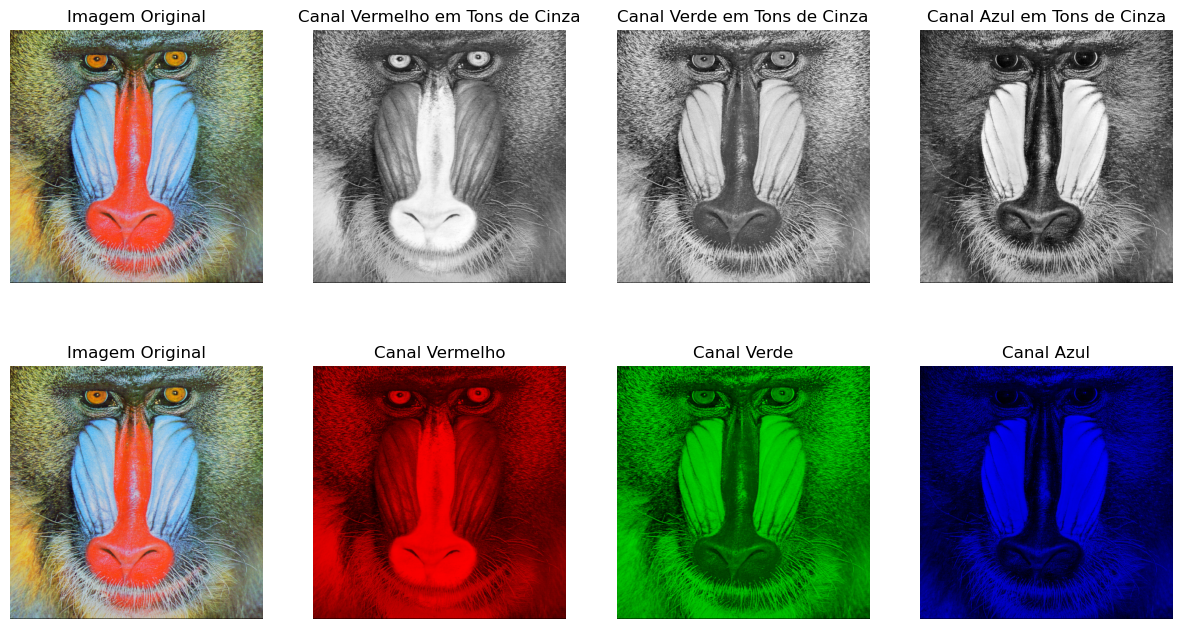

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem e mudar o formato para RGB
img = cv2.imread('baboon.png')
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar os canais de cor da imagem em níveis de cinza
(canalVermelho, canalVerde, canalAzul) = cv2.split(imagem)

# Visualizar o canal de cor na sua respectiva cor
zeros = np.zeros(imagem.shape[:2], dtype = "uint8")
img_CanalVermelho = cv2.merge([canalVermelho,zeros, zeros])
img_CanalVerde = cv2.merge([zeros, canalVerde, zeros])
img_CanalAzul = cv2.merge([zeros, zeros, canalAzul])

# Mostras as imagens
fig, subimagem = plt.subplots(2, 4, figsize=(15, 8))
subimagem[0,0].imshow(imagem)
subimagem[0,0].set_title("Imagem Original")
subimagem[0,0].axis('off')
subimagem[0,1].imshow(canalVermelho, cmap='gray')
subimagem[0,1].set_title("Canal Vermelho em Tons de Cinza")
subimagem[0,1].axis('off')
subimagem[0,2].imshow(canalVerde, cmap='gray')
subimagem[0,2].set_title("Canal Verde em Tons de Cinza")
subimagem[0,2].axis('off')
subimagem[0,3].imshow(canalAzul, cmap='gray')
subimagem[0,3].set_title("Canal Azul em Tons de Cinza")
subimagem[0,3].axis('off')
subimagem[1,0].imshow(imagem)
subimagem[1,0].set_title("Imagem Original")
subimagem[1,0].axis('off')
subimagem[1,1].imshow(img_CanalVermelho)
subimagem[1,1].set_title("Canal Vermelho")
subimagem[1,1].axis('off')
subimagem[1,2].imshow(img_CanalVerde)
subimagem[1,2].set_title("Canal Verde")
subimagem[1,2].axis('off')
subimagem[1,3].imshow(img_CanalAzul)
subimagem[1,3].set_title("Canal Azul")
subimagem[1,3].axis('off')

plt.show()

Agora que a imagem está carregada no programa, foi realizada a segmentação de cada canal de cor em planos de bits. Sabe-se que cada banda da imagem carrega o valor da intensidade $i$ do pixel naquele plano, em que $i = \{i \in \Z | 0 \leq i \leq 255 \}$. Esse valor é representado por meio de um *byte*, ou seja, para o valor $i = 115$ teremos o binário $01110011$ associado. O acesso a um bit em específico é efetuado por meio dos operadores bitwise '\&' e '\gt \gt'. Primeiro é aplicado o operador AND no valor $i$ com a string binária de zeros com o valor $1$ encontra-se na posição do bit desejado, obtendo uma nova string binária com o bit desejado. Para o número $155$ e o desejo de acessar o segundo bit mais significativo, teremos $01110011  \&  01000000 \rarr 01000000$. Por fim, é preciso realizar um deslocamento do bit desejado para a posição menos significativa. Seguindo o exemplo anterior, arrastar o segundo bit mais significativo para o bit menos significativo, ou seja, $01000000 \gt \gt 6 \rarr 00000001$. 

Realizado este procedimento em cada pixel daquele canal de cor é possível construir uma nova imagem binária associada a um plano de bits. O trecho de código abaixo ilustra a obtenção dos oito plano de bits para cada banda, em seguida é representada a imagem binária resultante.

IndexError: index 3 is out of bounds for axis 0 with size 3

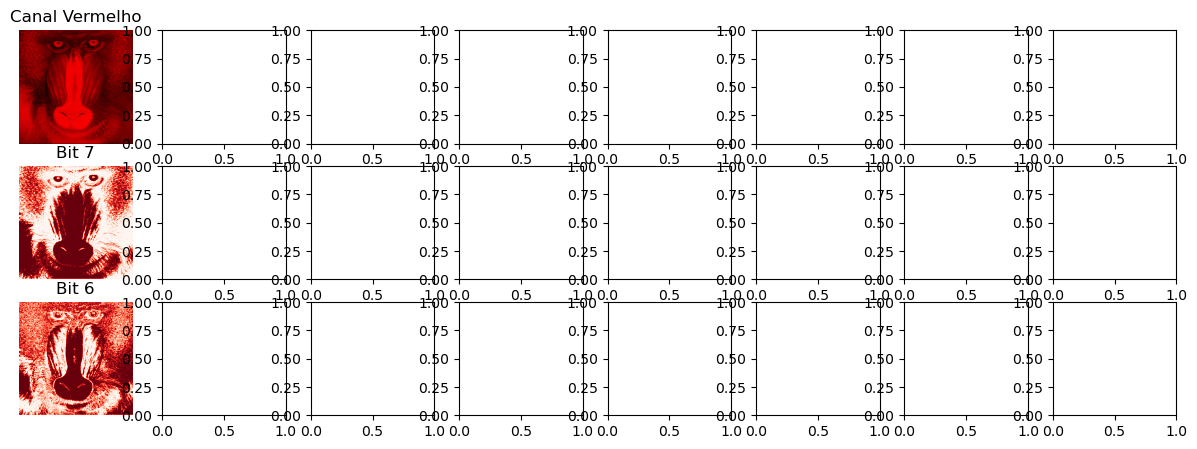

In [2]:
# Acessar os pixels do canal vermelho e mostrar a imagem em cada plano de bits

bit7_canalVermelho = (canalVermelho & 0b10000000) >> 7
bit6_canalVermelho = (canalVermelho & 0b01000000) >> 6
bit5_canalVermelho = (canalVermelho & 0b00100000) >> 5
bit4_canalVermelho = (canalVermelho & 0b00010000) >> 4
bit3_canalVermelho = (canalVermelho & 0b00001000) >> 3
bit2_canalVermelho = (canalVermelho & 0b00000100) >> 2
bit1_canalVermelho = (canalVermelho & 0b00000010) >> 1

bit7_canalVerde = (canalVerde & 0b10000000) >> 7
bit6_canalVerde = (canalVerde & 0b01000000) >> 6
bit5_canalVerde = (canalVerde & 0b00100000) >> 5
bit4_canalVerde = (canalVerde & 0b00010000) >> 4
bit3_canalVerde = (canalVerde & 0b00001000) >> 3
bit2_canalVerde = (canalVerde & 0b00000100) >> 2
bit1_canalVerde = (canalVerde & 0b00000010) >> 1

bit6_canalAzul = (canalAzul & 0b01000000) >> 6
bit7_canalAzul = (canalAzul & 0b10000000) >> 7
bit5_canalAzul = (canalAzul & 0b00100000) >> 5
bit4_canalAzul = (canalAzul & 0b00010000) >> 4
bit3_canalAzul = (canalAzul & 0b00001000) >> 3
bit2_canalAzul = (canalAzul & 0b00000100) >> 2
bit1_canalAzul = (canalAzul & 0b00000010) >> 1

fig, subimagem = plt.subplots(3, 8, figsize=(15, 5))
subimagem[0,0].imshow(img_CanalVermelho)
subimagem[0,0].set_title("Canal Vermelho")
subimagem[0,0].axis('off')
subimagem[1,0].imshow(bit7_canalVermelho, cmap='Reds')
subimagem[1,0].set_title("Bit 7")
subimagem[1,0].axis('off')
subimagem[2,0].imshow(bit6_canalVermelho, cmap='Reds')
subimagem[2,0].set_title("Bit 6")
subimagem[2,0].axis('off')
subimagem[3,0].imshow(bit5_canalVermelho, cmap='Reds')
subimagem[3,0].set_title("Bit 5")
subimagem[3,0].axis('off')
subimagem[4,0].imshow(bit4_canalVermelho, cmap='Reds')
subimagem[4,0].set_title("Bit 4")
subimagem[4,0].axis('off')
subimagem[5,0].imshow(bit3_canalVermelho, cmap='Reds')
subimagem[5,0].set_title("Bit 3")
subimagem[5,0].axis('off')
subimagem[6,0].imshow(bit2_canalVermelho, cmap='Reds')
subimagem[6,0].set_title("Bit 2")
subimagem[6,0].axis('off')
subimagem[7,0].imshow(bit1_canalVermelho, cmap='Reds')
subimagem[7,0].set_title("Bit 1")
subimagem[7,0].axis('off')

subimagem[0,1].imshow(img_CanalVerde)
subimagem[0,1].set_title("Canal Verde")
subimagem[0,1].axis('off')
subimagem[1,1].imshow(bit7_canalVerde, cmap='Blue')
subimagem[1,1].set_title("Bit 7")
subimagem[1,1].axis('off')
subimagem[2,1].imshow(bit6_canalVerde, cmap='Blue')
subimagem[2,1].set_title("Bit 6")
subimagem[2,1].axis('off')
subimagem[3,1].imshow(bit5_canalVerde, cmap='Blue')
subimagem[3,1].set_title("Bit 5")
subimagem[3,1].axis('off')
subimagem[4,1].imshow(bit4_canalVerde, cmap='Blue')
subimagem[4,1].set_title("Bit 4")
subimagem[4,1].axis('off')
subimagem[5,1].imshow(bit3_canalVerde, cmap='Blue')
subimagem[5,1].set_title("Bit 3")
subimagem[5,1].axis('off')
subimagem[6,1].imshow(bit2_canalVerde, cmap='Blue')
subimagem[6,1].set_title("Bit 2")
subimagem[6,1].axis('off')
subimagem[7,1].imshow(bit1_canalVerde, cmap='Blue')
subimagem[7,1].set_title("Bit 1")
subimagem[7,1].axis('off')

subimagem[0,2].imshow(img_CanalVermelho)
subimagem[0,2].set_title("Canal Vermelho")
subimagem[0,2].axis('off')
subimagem[1,2].imshow(bit7_canalVermelho, cmap='Reds')
subimagem[1,2].set_title("Bit 7")
subimagem[1,2].axis('off')
subimagem[2,2].imshow(bit6_canalVermelho, cmap='Reds')
subimagem[2,2].set_title("Bit 6")
subimagem[2,2].axis('off')
subimagem[3,2].imshow(bit5_canalVermelho, cmap='Reds')
subimagem[3,2].set_title("Bit 5")
subimagem[3,2].axis('off')
subimagem[4,2].imshow(bit4_canalVermelho, cmap='Reds')
subimagem[4,2].set_title("Bit 4")
subimagem[4,2].axis('off')
subimagem[5,2].imshow(bit3_canalVermelho, cmap='Reds')
subimagem[5,2].set_title("Bit 3")
subimagem[5,2].axis('off')
subimagem[6,2].imshow(bit2_canalVermelho, cmap='Reds')
subimagem[6,2].set_title("Bit 2")
subimagem[6,2].axis('off')
subimagem[7,2].imshow(bit1_canalVermelho, cmap='Reds')
subimagem[7,2].set_title("Bit 1")
subimagem[7,2].axis('off')

plt.show()



In [ ]:
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.show()

In [ ]:
img = cv2.imread("baboon.png")
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.title('my picture')
plt.show()

In [ ]:
(canalVermelho, canalVerde, canalAzul) = cv2.split(imagem) 
print("Imagem", imagem.shape)
print(imagem[0,0])
print("Canal Vermelho", canalVermelho.shape)
print(canalVermelho[0,0])
mostrar_imagem(canalVermelho, "Canal Vermelho", "gray")
mostrar_imagem(canalVerde, "Canal Verde","gray")
mostrar_imagem(canalAzul, "Canal Azul", "gray")

In [ ]:
resultado = cv2.merge([canalVermelho, canalVerde, canalAzul]) 
mostrar_imagem(resultado, "Imagem Original")

In [ ]:
zeros = np.zeros(imagem.shape[:2], dtype = "uint8")
print(imagem.shape)
print(imagem.shape[:2])
print(zeros)
img_vermelho = cv2.merge([canalVermelho,zeros, zeros])
img_verde = cv2.merge([zeros, canalVerde, zeros])
img_azul = cv2.merge([zeros, zeros, canalAzul])
# mostrar_imagem(img_vermelho, "Canal Vermelho")
# mostrar_imagem(img_verde, "Canal Verde")
# mostrar_imagem(img_azul, "Canal Azul")

# mostra as imagens uma ao lado das outras sem os eixos usando ax e fig
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(imagem)
ax[0, 0].set_title("Imagem Original")
ax[0, 0].axis('off')
ax[0, 1].imshow(img_vermelho)
ax[0, 1].set_title("Canal Vermelho")
ax[0, 1].axis('off')
ax[0, 2].imshow(img_verde)
ax[0, 2].set_title("Canal Verde")
ax[0, 2].axis('off')
ax[1, 0].imshow(img_azul)
ax[1, 0].set_title("Canal Azul")
ax[1, 0].axis('off')
ax[1, 1].imshow(canalVermelho, cmap="gray")
ax[1, 1].set_title("Canal Vermelho")
ax[1, 1].axis('off')
ax[1, 2].imshow(canalVerde, cmap="gray")
ax[1, 2].set_title("Canal Verde")
ax[1, 2].axis('off')

plt.show()


In [ ]:
# primeiro pixel do canal vermelho
pixel = canalVermelho[0, 0]
print(pixel)
# converter pixel para binário
pixel_binario = bin(pixel)
#print(type(pixel_binario))
print(pixel_binario)

# pegar o bit 0, 1, 2 e 7
bit0 = (pixel & 0b00000001) 
bit1 = (pixel & 0b00000010) >> 1
bit2 = (pixel & 0b00000100) >> 2
bit7 = (pixel & 0b10000000) >> 7
print(bit7, bit2, bit1, bit0)
print(type(bit7))

In [ ]:
img_bit7 = (canalVermelho & 0b10000000) >> 7
#img_bit7 = img_bit7.astype(bool)
mostrar_imagem(img_bit7, "Bit 7", "Reds")
print(type(img_bit7[0,0]))
print(img_bit7)
# img_bit7 = (canalVermelho & 0b10000000)
# mostrar_imagem(img_bit7, "Bit 7", "gray")


In [ ]:
img_bit6 = (canalVermelho & 0b00000001) >> 0
#img_bit7 = img_bit7.astype(bool)
mostrar_imagem(img_bit6, "Bit 6", "Reds")
print(type(img_bit6[0,0]))
print(img_bit6)
# img_bit7 = (canalVermelho & 0b10000000)
# mostrar_imagem(img_bit7, "Bit 7", "gray")

In [ ]:
mensagem = "Voz das manhãs cantando pelos sinos, \nRosa mais alta no mais alto galho:\n\nDe quem me valerei, se não me valho \nDe ti, que tens a chave dos destinos "
#mensagem = "A"
mensagem_binaria = np.zeros(3*8*len(mensagem), dtype=int)
pos = 0
for caractere in mensagem:
    caractere_unicode = ord(caractere) # converte o caractere para o código unicode
    for i in range(24):
        a = (caractere_unicode & 1)
        mensagem_binaria[pos] = a
        pos += 1
        caractere_unicode = caractere_unicode >> 1
        
mensagem_binaria = mensagem_binaria[::-1]  

# realizar o processo inverso

mensagem_decodificada = ""
for i in range (0,len(mensagem_binaria),24):
    c_bin = 0
    for j in range(24):
        c_bin = c_bin << 1
        #print(j, c_bin)
        c_bin += mensagem_binaria[i+j]
        #print(mensagem_binaria[i+j], c_bin)
    
    mensagem_decodificada += chr(c_bin)
    #print(mensagem_decodificada, c_bin)
mensagem_decodificada = mensagem_decodificada[::-1]
print(mensagem_decodificada)
    

In [ ]:
def transformar_texto_binario(mensagem: str):
    mensagem_binaria = np.zeros(3*8*len(mensagem), dtype=int)
    pos = 0
    for caractere in mensagem:
        caractere_unicode = ord(caractere) # converte o caractere para o código unicode
        for i in range(24):
            a = (caractere_unicode & 1)
            mensagem_binaria[pos] = a
            pos += 1
            caractere_unicode = caractere_unicode >> 1   
    mensagem_binaria = mensagem_binaria[::-1]  
    print(mensagem_binaria)
    return mensagem_binaria

In [ ]:
def transformar_binario_texto(mensagem_binaria: str):
    mensagem_decodificada = ""
    for i in range (0,len(mensagem_binaria),24):
        c_bin = 0
        for j in range(24):
            c_bin = c_bin << 1
            c_bin += mensagem_binaria[i+j]
        mensagem_decodificada += chr(c_bin)
    mensagem_decodificada = mensagem_decodificada[::-1]
    print(mensagem_decodificada)
    return mensagem_decodificada

In [ ]:
def codificar(imagem, texto: str, plano_bits  nome):
   texto_binario = transformar_texto_binario(texto)
   print(texto_binario)
   imagem_codificada = np.copy(imagem)
   return imagem_codificada

In [ ]:
def decodificar(texto:str, plano_bits = nome):
    mensagem_extraida = decodificar(str, plano_bits)
     return texto

In [ ]:
# Programa principal
# Abrir a imagem que será codificada
imagem = cv2.imread("peppers.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 
#mostrar_imagem(imagem, "Imagem Original")
# Abrir o arquivo de texto que será codificado
texto = open("cod_simples.txt", "r").read()
#print(texto)

# Selecionar o plano de bits
plano_bits = 2

# Codificar o texto na imagem
imagem_codificada = codificar(imagem, texto, plano_bits)

# Mostrar resultados
# Decodificar o texto da imagem
# Mostrar resultados